# Tarea 1. Introducción a LaTeX, Python y recursos de la red.


## 1. Gráficas de M57 a partir de los datos en hst_12309_01_wfc3_uvis_f656n

(a) Despliegue la imagen de ciencia (HDU 1 del archivo con terminación drz.fits) Añada una barra de color. Utilice las unidades adecuadas para los ejes y la barra de color. La salida debe de ser similar a la Figura 1.

In [250]:
# Import packages
import cmasher as cmr
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Para ver la estructura del archivo:
#fits.info(m57_file) 

im = fits.open ("hst_12309_01_wfc3_uvis_f656n_drz.fits")
#print ("Numero de HDUs: ", len(im))
#print ('Fecha: ', im[0].header['DATE'])
#print ('Tiempo de exposición:', im[0].header['EXPTIME'], 's')
#im.info()

In [254]:
# De im.info() sabemos que la imagen de ciencia se encuentra en el HDU 1: 
image_data = im[1].data
#print(type(image_data))
#El tamaño de la imagen, sirve para determinar el rango de valores de los ejes.
print(image_data.shape) 

(5800, 5656)


<font color=red>(a)</font> A continuación se muestra la imagen de ciencia (HDU 1 del archivo). Se añade una barra de color que indica el número de detecciones por píxel (counts), este 'conteo de detecciones' puede emplearse para calcular el flujo en unidades de erg $cm^{-2} s^{-1} A^{-1}$. Para obtener el flujo se multiplica el número total de detecciones por el valor de la palabra clave PHOTFLAM, y se divide por el tiempo de exposición que se encuentra en la palabra clave EXPTIME.

(a) Despliega la imagen de ciencia 


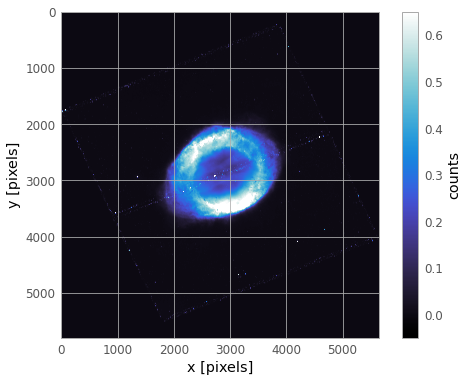

In [252]:
#(a)
print('(a) Despliega la imagen de ciencia ')
plt.figure()
plt.imshow(image_data, cmap='cmr.freeze') 
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
#añade barra de color
plt.colorbar(label='counts')       
#rango de la barra de color, esta la encontré graficando LogNorm primero =P 
plt.clim(-0.05,0.65)  
plt.savefig('pb1-1.png')

(Punto extra: Utilice la librería WCS de astropy para desplegar en la proyección adecuada las imágenes de este ejercicio.)
Como se ve de la imagen anterior, ésta se proyecta en un plano dependiente del detector, donde las coordenadas corresponden a la posicion del píxel en el mismo.
Para obtener una proyección en coordenadas ecuatoriales usamos el paquete astropy.wcs, donde wcs significa 'world coordinate system'. De este modo ahora obtenemos la imagen proyectada en declinación contra ascención recta. La barra de color sigue indicando el número de detecciones (counts).

Proyección en coordenadas ecuatoriales usando WCS


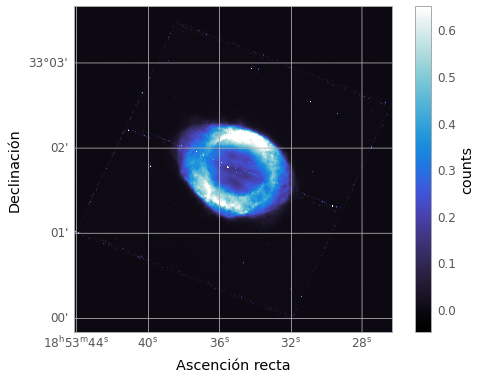

In [233]:
from astropy.wcs import WCS
print('Proyección en coordenadas ecuatoriales usando WCS')
# Hay que tener cuidado cuando el fits es multiextension. 
wcs = WCS(im[1].header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(im[1].data, origin='lower', cmap='cmr.freeze') 
plt.xlabel('Ascención recta')
plt.ylabel('Declinación')
plt.colorbar(label='counts') 
plt.clim(-0.05,0.65)
plt.savefig('pb1-2.png')

<font color=red>(b)</font> La imagen de pesos (HDU 2) se proyecta en coordenadas ecuatoriales como en el caso anterior. 

(b) Despliega la imagen de pesos


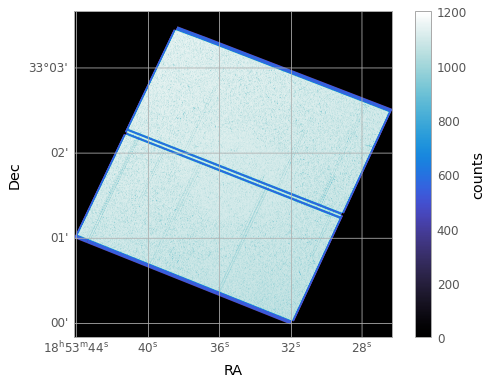

In [255]:
# (b)
print('(b) Despliega la imagen de pesos')
# Para abrir la imagen de pesos vamos al HDU 2 == im[2]
wcs = WCS(im[2].header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(im[2].data, origin='lower', cmap='cmr.freeze')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar(label='counts') 
plt.clim(0,1200)
plt.savefig('pb1-3.png')

<font color=red>(c)</font> Despliega el histograma de los píxeles de la imagen de ciencia ¿Qué características notas de esta distribución? 
Al inspeccionar el histograma de los píxeles de la imagen de ciencia se obtiene un rango muy amplio de valores por lo que vale la pena explorar el rango del histograma para hallar la región mas relevante del mismo. Se tiene que hay píxeles con conteos muy altos pero estos casos son pocos y espaciados entre si. La mayoría de los conteos se encuentran en los bines entre 0 y 10. En cuanto a la frecuencia tambíen se tiene que en los primeros bines se concentran la mayoría de los pixeles, una concetraciónde varios ordenes de magnitd mayor que la del resto de la distribución, por lo que para apreciar la forma del histograma fue necesario usar escala logaritmica en el eje y que muetra la frecuencia del histograma.

In [235]:
# (c)
# To make a histogram with matplotlib.pyplot.hist(), 
# I need to cast the data from a 2-D to array to something one dimensional.
# In this case, I am using the ndarray.flatten() to return a 1-D numpy array.

#print(type(im[1].data.flatten()))

(c) Despliega el histograma de los píxeles de la imagen de ciencia.


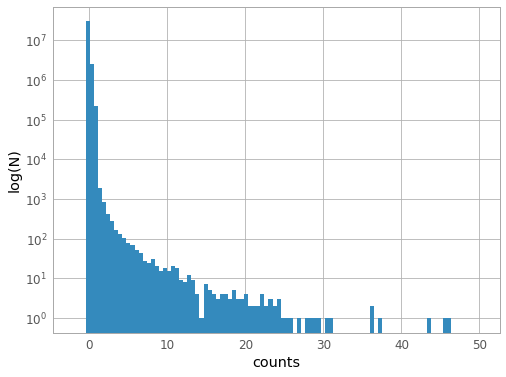

In [249]:
print('(c) Despliega el histograma de los píxeles de la imagen de ciencia.')
NBINS = 100
histogram = plt.hist(im[1].data.flatten(), NBINS, range=(-2, 50)) 
plt.yscale('log')
plt.xlabel('counts')
plt.ylabel('log(N)')
plt.savefig('pb1-4.png')

<font color=red>(d)</font> Accede a la información del encabezado y obten el tiempo de exposición de la imagen, la fecha en la que se realizó la observación, el tamaño del píxel y las coordenadas del píxel central en coordenadas ecuatoriales. 
Para poder obtener esta información es necesario conocer el contenido de los keywords relevantes por lo que es necesario revisar la siguiente información:  http://hosting.astro.cornell.edu/~vassilis/isocont/node17.html
Además de leer el header completo de los HDU 0 y HDU 1.

In [237]:
# (d) 
print('(d) \n')
print ('Fecha de observación: ', im[0].header['DATE-OBS'])
print ('Tiempo de exposición: ', im[0].header['EXPTIME'], 's')

print ('\nTamaño del píxel: ', im[1].header['CD1_1'], 'deg/pixel,', im[1].header['CD2_2'], 'deg/pixel')


#print ('\nCoordenadas del objeto: ')
#print ('RA: ', im[0].header['RA_TARG'], 'deg')             #right ascension of the target (deg) (J2000)   
#print ('DEC:', im[0].header['DEC_TARG'], 'deg')            # declination of the target (deg) (J2000)
#print ( im[0].header)


print ('\nCoordenadas del píxel central en coordenadas ecuatoriales: ')
print ('RA: ', im[1].header['CRVAL1'], 'deg')            
print ('DEC:', im[1].header['CRVAL2'], 'deg')            

(d) 

Fecha de observación:  2011-09-19
Tiempo de exposición:  1120.0 s

Tamaño del píxel:  -1.1005555796954e-05 deg/pixel, 1.10055557969543e-05 deg/pixel

Coordenadas del píxel central en coordenadas ecuatoriales: 
RA:  283.3967283281104 deg
DEC: 33.02918214895566 deg


<font color=red>(e)</font> Calcula el valor máximo, mínimo, el promedio y la desviación estándar de la imagen de ciencia. 

In [238]:
# (e)
print('(e) Calcula el valor máximo, mínimo, el promedio y la desviación estándar de la imagen de ciencia.\n')
print('Mínimo:', np.min(image_data))
print('Máximo:', np.max(image_data))
print('Promedio:', np.mean(image_data))
print('Desviación estándar:', np.std(image_data))


(e) Calcula el valor máximo, mínimo, el promedio y la desviación estándar de la imagen de ciencia.

Mínimo: -0.028128875
Máximo: 53946.867
Promedio: 0.034581296
Desviación estándar: 9.853648


<font color=red>(f)</font> Debido a la geometríá del CCD algunos píxeles en la imagen no fueron expuestos, estos píxeles se identifican con un valor cero en la imagen de pesos. Utilizando la función <font color=blue>where</font> de la librería <font color=blue>numpy</font> encuentra en la imagen de pesos los índices de los píxeles expuestos. Utilice estos índices para calcular el máximo, mínimo, el promedio y la desviación estándar de los píxeles expuestos en la imagen de ciencia. Compara con los resultados del inciso anterior. 

In [239]:
print('(f) Calcula máximo, mínimo, promedio y desviación estándar de sólo los píxeles expuestos en la imagen de ciencia.')
# Buscar los índices de los píxeles con valor distinto de cero usando np.where 
a = im[2].data  # En la imagen de pesos.
#print('a= ',type(a))
#print(len(a))
#print (a)

b = np.where((a>0) | (a<0))  # los índices de los pixeles expuestos 
#print('b ',type(b))
#print(len(b))

#c = np.where(a == 0)   # los índices de los pixeles no-expuestos 
#print(c) 
#print('c ',type(c))
#print (image_data[5799][5655])


#np.asarray convierte tuple en arreglo
d = np.asarray(b)
#print('d type: ', type(d))
#print(d.shape)
#print('d: ',d)
x = d[0,:]
#print('x: ',x)
y = d[1,:]
#print('y: ',y)
#print(type(x))
#print(type(y))

new = image_data[x,y] # arreglo que sólo contiene las entradas de image_data != 0 
#print('new:',new)

# Utilice estos índices para calcular el máximo, mínimo, el promedio y la desviación estándar 
# de los píxeles expuestos en la imagen de ciencia. Compara con los resultados del inciso anterior.
print('\nMínimo:', np.min(new))
print('Máximo:', np.max(new))
print('Promedio:', np.mean(new))
print('Desviación estándar:', np.std(new))

#resultados de e)
#Mínimo: -0.028128875
#Máximo: 53946.867
#Promedio: 0.034581296
#Desviación estándar: 9.853648

(f) Calcula máximo, mínimo, promedio y desviación estándar de sólo los píxeles expuestos en la imagen de ciencia.

Mínimo: -0.028128875
Máximo: 53946.867
Promedio: 0.06522729
Desviación estándar: 13.533891


Al descartar aquellos píxeles que no fueron expuestos se mantiene, como era de esperarse, los valores de máximo y mínimo. El promedio aumenta casi un factor dos, pues ahora se tienen menos píxeles en los que se 'diluya' el valor de aquellos que si fueron expuestos. La desviación estándar también aumenta dado que la distribución completa se ha movido a valores mas bajos. 

<font color=red>(g)</font>  Algunos píxeles son afectados por rayos cósmicos, produciendo valores extremadamente grandes en la imagen. Utiliza la funcion <font color=blue>sigma_clip</font> de la libreria <font color=blue>astropy.stats</font> para eliminar estos píxeles. Calcula nuevamente el máximo, mínimo, el promedio y la desviación estándar. Compara con los resultados de los incisos anteriores.

In [260]:
# (g)
from astropy.stats import sigma_clip

print('(g) Utiliza la funcion sigma_clip para eliminar píxeles extremadamente grandes.\n')
# We clip all points that are more than 2 sample standard deviations 
# from the median. The result is a masked array, where the mask is True for clipped data:
filtered_data = sigma_clip(new, sigma=2, maxiters=1)

print('Mínimo:', np.min(filtered_data))
print('Máximo:', np.max(filtered_data))
print('Promedio:', np.mean(filtered_data))
print('Desviación estándar:', np.std(filtered_data))


(g) Utiliza la funcion sigma_clip para eliminar píxeles extremadamente grandes.

Mínimo: -0.028128875
Máximo: 27.062498
Promedio: 0.06052910186789533
Desviación estándar: 0.15504272948604153


En este caso se uso la función sigma_clip para descartar los píxeles cuyos valores se encuentran a más de dos desviaciones estándar de la mediana. Con esto se mantiene el valor mínimo, el máximo ahora ha disminuido considerablemente, ya no se extiende varios ordenes de magnitud como en el caso original. El promedio se mantiene similar al obtenido en el caso en que se desecharon los píxeles no expuestos, esto se debe a que; aunque se desecharon los píxeles de valores muy altos, estos no eran muy abundantes; es decir, el número de píxeles no se altero demasiado.

<font color=red>(h)</font> Se despliega la imagen de ciencia usando el máx. y mín. obtenidos en el inciso anterior. 

En este inciso debo mencionar que para obtener la imagen de ciencia anterior lo primero que hice fue usar una escala logarítmica para hallar el rango relevante del conteno de detecciones (counts). Así fue como determine el rango de plt.clim(-0.05,0.65). Como se puede ver en la imagen siguiente, el máximo obtenido de filtrar los datos  que se encuentran a más de dos desviaciones estándar de la mediana no ha sdo suficiente para obtener el rango relevante de la imagen de ciencia.

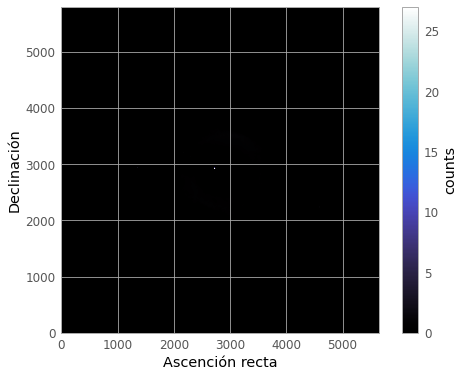

In [261]:
plt.imshow(im[1].data, origin='lower', cmap='cmr.freeze') 
plt.xlabel('Ascención recta')
plt.ylabel('Declinación')
plt.colorbar(label='counts') 
plt.clim(-0.03,27)

<font color=red>(i)</font> Obten del encabezado el filtro empleado en esta observación. ¿A qué transición corresponde?

In [241]:
# (i)
print ('(i) Filtro empleado en esta observación = ', im[1].header['PHOTMODE'])
#HST/WFC3_UVIS2 :The Wide Field Camera 3, UVIS channel, chip 2.

(i) Filtro empleado en esta observación =  WFC3 UVIS2 F656N CAL


Este filtro tiene una longitud de onda promedio de 656 nm que corresponde a la transición n=3 a n=2 de la serie de Balmer. Más características del filtro se pueden ver en: http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?id=HST/WFC3_UVIS2.F656N&&mode=browse&gname=HST&gname2=WFC3_UVIS2#filter

## 2. A partir del archivo 3c279_sma.csv  hacer lo siguiente,

La descripción de las columnas del archivo se encuentra en el cuadro.

<font color=red>(a)</font> Lee los datos de la fecha, hora, el flujo y su error asociado. Transforma las columnas de Día, Mes y Año a Dıas Julianos (JD).

Ver https://docs.astropy.org/en/stable/time/

In [273]:
import numpy as np
from astropy.time import Time
import pandas as panda
import calendar

print('2. Cuásar 3c279')
print('(a)Transforma las columnas de Día, Mes y Año a días julianos (JD)\n')

f = panda.read_csv("3c279_sma.csv")
#print (f.keys())

# Reescribir usando número en vez del nombre del mes
d = dict((v,k) for v,k in zip(calendar.month_abbr[1:], range(1, 13)))
f.MONTH = f.MONTH.map(d)
#print(f.MONTH)

# Columna nueva en el formato de Time:
cols = ['YEAR', 'MONTH', 'DAY']
newcol = ['-'.join(i) for i in f[cols].astype(str).values]
f_new = f.assign(DATE=newcol) #.drop(cols,1) 
#print(f_new.DATE)
#print(type(f_new)) 
#print(type(f.MONTH))
#print(type(f_new.DATE))

fecha = np.asarray(f_new.DATE)
#print('fecha type: ',type(fecha))
#print(np.shape(fecha))
g = fecha.tolist()
#print("g type:", type(g))   #Time sólo lee listas al parecer.

# convierte a JD y MJD
t = Time(g, format='iso')
t.format = 'jd'
jd = np.asarray(t.value)
print('\n=============  Fechas en JD:  ===================================\n', jd)

t.format = 'mjd'
mjd =  np.asarray(t.value)
#mjd

#Guardar jd y mjd como columnas de un nuevo csv:
panda1 = panda.DataFrame(jd)
panda2 = panda.DataFrame(mjd)

pan1 = panda.read_csv('3c279_new.csv')
pan1['JD'] = panda1
pan1.to_csv('3c279_new.csv', index=False, mode='w')

pan1['MJD'] = panda2
pan1.to_csv('3c279_new.csv', index=False, mode='w')

print('\nLas fechas en JD y MJD se guardan en las dos últimas columnas del archivo\n')
print (pan1.keys())
#print(pan1)
#print (f.keys()) 


2. Cuásar 3c279
(a)Transforma las columnas de Día, Mes y Año a días julianos (JD)


=============  Fechas en JD:  ===================================
 [2455202.5 2455203.5 2455204.5 2455208.5 2455210.5 2455226.5 2455231.5
 2455232.5 2455232.5 2455233.5 2455241.5 2455247.5 2455263.5 2455264.5
 2455271.5 2455273.5 2455274.5 2455280.5 2455281.5 2455282.5 2455286.5
 2455288.5 2455289.5 2455290.5 2455297.5 2455298.5 2455312.5 2455312.5
 2455319.5 2455331.5 2455331.5 2455333.5 2455335.5 2455343.5 2455352.5
 2455352.5 2455354.5 2455355.5 2455362.5 2455365.5 2455366.5 2455369.5
 2455373.5 2455406.5 2455420.5 2455425.5 2455433.5 2455505.5 2455517.5
 2455522.5 2455523.5 2455524.5 2455529.5 2455530.5 2455544.5 2455544.5
 2455544.5 2455544.5 2455557.5 2455560.5 2455560.5 2455560.5 2455562.5
 2455566.5 2455568.5 2455571.5 2455579.5 2455586.5 2455588.5 2455588.5
 2455594.5 2455594.5 2455594.5 2455600.5 2455608.5 2455608.5 2455609.5
 2455610.5 2455611.5 2455615.5 2455615.5 2455621.5 2455622.5 2455623

<font color=red>(b)</font> Grafique los datos de flujo contra el valor del dıa juliano modificado (MJD). Incluya las barras de error asociadas con los valores de flujo.

(b) Gráfica de flujo contra día juliano modificado (MJD).



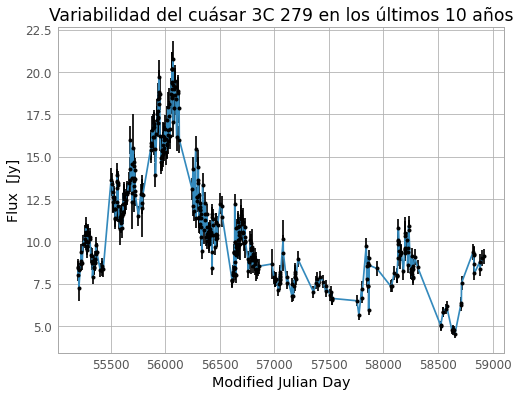

In [270]:
print('(b) Gráfica de flujo contra día juliano modificado (MJD).\n')

plt.plot(pan1['MJD'],pan1['FLUX'])
plt.errorbar(pan1['MJD'],pan1['FLUX'], yerr=pan1['ERROR'], fmt='.k')
plt.xlabel('Modified Julian Day')
plt.ylabel('Flux  [Jy]')
plt.title('Variabilidad del cuásar 3C 279 en los últimos 10 años')
#plt.xlim(58000,58500)
plt.savefig('flux.png')